**Prendere in considerazione le informazioni geografiche riguardanti i confini amministrativi italiani (caricati in un post precedente) e realizzare un notebook che:**


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 37.2 MB/s 
     |████████████████████████████████| 15.4 MB 42.7 MB/s 


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 1.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import geopandas
import contextily

In [ ]:
Regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/Mappa Italia/Reg01012021_g")
Regioni

COD_RIP  ...                                           geometry
0         1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
1         1  ...  POLYGON ((390652.644 5091766.171, 390748.643 5...
2         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
3         2  ...  POLYGON ((743267.749 5219765.793, 743387.812 5...
4         2  ...  POLYGON ((768123.960 5175397.497, 768135.210 5...
5         2  ...  MULTIPOLYGON (((872344.457 5061894.048, 872344...
6         1  ...  MULTIPOLYGON (((568226.691 4874823.573, 568219...
7         2  ...  MULTIPOLYGON (((618343.929 4893985.661, 618335...
8         3  ...  MULTIPOLYGON (((674426.642 4680710.364, 674563...
9         3  ...  MULTIPOLYGON (((776982.140 4832209.918, 776910...
10        3  ...  POLYGON ((802303.985 4874996.456, 802366.734 4...
11        3  ...  MULTIPOLYGON (((875952.995 4524692.050, 875769...
12        4  ...  MULTIPOLYGON (((930273.425 4714737.743, 930147...
13        4  ...  POLYGON ((984002.800 4670714.415, 985067.040 4...
14        4  ...  MULTIPOLYGON (((1037313.692 4449410.367, 10373...
15        4  ...  MULTIPOLYGON (((1280636.111 4454459.746, 12806...
16        4  ...  MULTIPOLYGON (((1073707.061 4445700.106, 10737...
17        4  ...  MULTIPOLYGON (((1083358.846 4416348.741, 10833...
18        5  ...  MULTIPOLYGON (((822886.611 3935355.889, 822871...
19        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[20 rows x 6 columns]

In [ ]:
Regioni.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia**

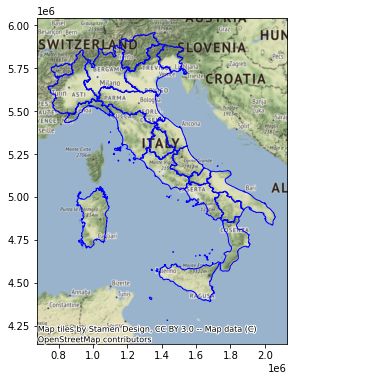

In [ ]:
ax = Regioni.to_crs(epsg=3857).plot(figsize =(12,6), facecolor='none', edgecolor='blue')
contextily.add_basemap(ax)

**2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa (https://contextily.readthedocs.io/en/latest/providers_deepdive.html)**

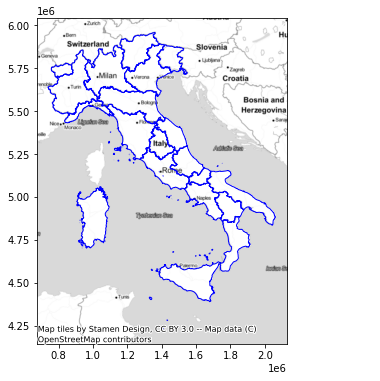

In [ ]:
import xyzservices.providers as xyz
ax = Regioni.to_crs(epsg=3857).plot(figsize =(12,6), facecolor='none', edgecolor='blue')
contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite)

**3. visualizzare le province della Lombardia su una mappa di contextily**

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/Mappa Italia/ProvCM01012021_g")
province

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [ ]:
Lombardia = Regioni[Regioni.DEN_REG =="Lombardia"]
Lombardia 

COD_RIP  ...                                           geometry
2        1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...

[1 rows x 6 columns]

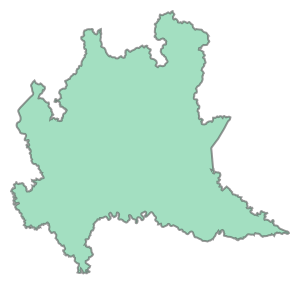

In [ ]:
lombardia1 = Regioni.loc[Regioni['DEN_REG'] == 'Lombardia', 'geometry'].squeeze()
lombardia1

In [ ]:
proLomb = province[province.within(lombardia1)]
proLomb

COD_RIP  ...                                           geometry
11         1  ...  POLYGON ((483071.566 5104606.092, 483258.471 5...
12         1  ...  MULTIPOLYGON (((498077.207 5089780.202, 497614...
13         1  ...  POLYGON ((595652.358 5163515.659, 596042.420 5...
14         1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...
15         1  ...  POLYGON ((585288.233 5104483.085, 585414.669 5...
16         1  ...  POLYGON ((615296.024 5132340.876, 615374.024 5...
17         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
18         1  ...  POLYGON ((542189.537 5037362.585, 542408.347 5...
19         1  ...  POLYGON ((630538.958 5031669.589, 632819.864 5...
96         1  ...  POLYGON ((532079.618 5104664.092, 533286.608 5...
97         1  ...  POLYGON ((534551.968 5035118.603, 534818.280 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...

[12 rows x 13 columns]

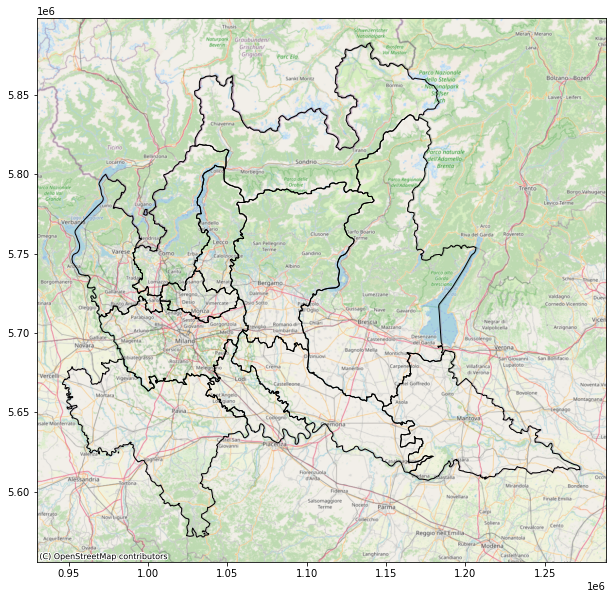

In [ ]:
ax = proLomb.to_crs(epsg=3857).plot(figsize=(20,10), facecolor= "none", edgecolor= "k")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

**4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti**

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/Mappa Italia/Com01012021_g")
comuni

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

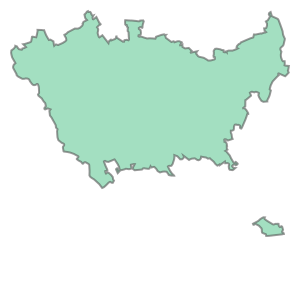

In [ ]:
milano = province.loc[province['DEN_CM'] == 'Milano', 'geometry'].squeeze()
milano

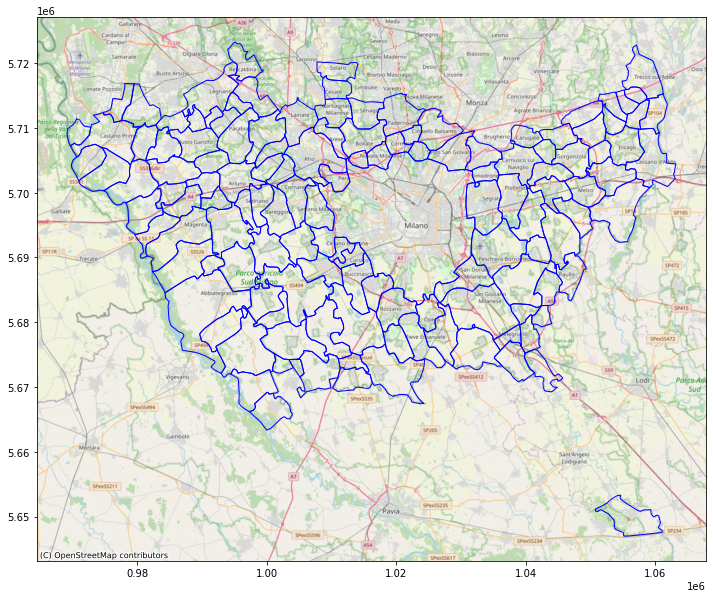

In [ ]:
comuniDiMilano = comuni[comuni.within(milano)]
ax = comuniDiMilano.to_crs(epsg= 3857).plot(figsize= (12,15), facecolor = "none", edgecolor = "b")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

**5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri** 

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/quartieri di Milano/ds964_nil_wm.zip")
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

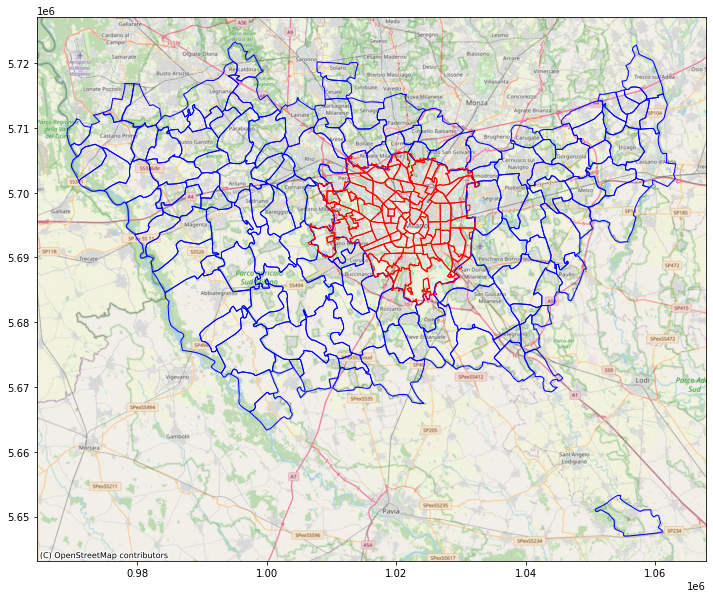

In [ ]:
ax = comuniDiMilano.to_crs(epsg= 3857).plot(figsize= (12,15), facecolor = "none", edgecolor = "b")
quartieri.to_crs(epsg= 3857).plot(ax=ax, facecolor = "none", edgecolor= "red")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

**6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.**

Inserisci una provincia: Milano


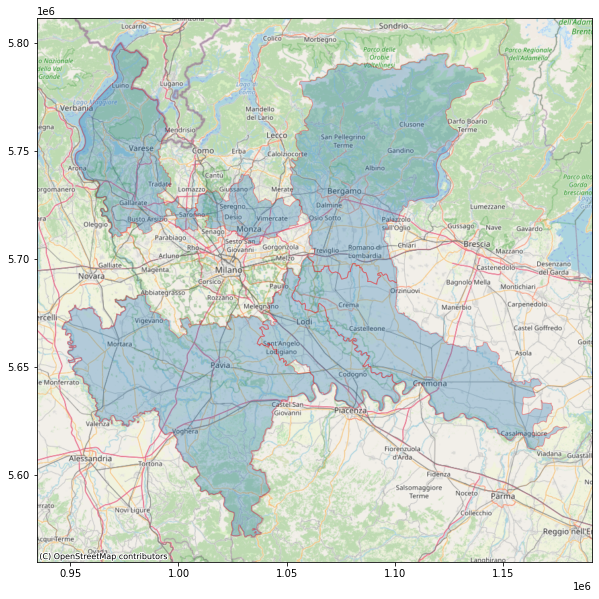

In [ ]:
input_prov= input("Inserisci una provincia: ")

inn = province[province["DEN_UTS"] == input_prov].geometry.squeeze()

if inn.within(lombardia1):
  ax = province[province.touches(inn) & province.within(lombardia1)].to_crs(epsg=3857).plot(figsize=(12,10), alpha = 0.3 , edgecolor = "red")
  contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)
else:
  print("La provincia non si trova all'interno della Regione Lombardia")
